In [ ]:
! git clone https://github.com/Cristhian-Guerrero/db.git

fatal: destination path 'db' already exists and is not an empty directory.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Cargar el dataset original
file_path = '/content/db/bd_2.csv'
df = pd.read_csv(file_path)

#df.head()

In [ ]:
import json

# Tomar el primer registro de notas_detalle
notas_detalle_example = df.loc[0, 'notas_detalle']
notas_detalle_list = json.loads(notas_detalle_example)

# Crear un dataframe a partir de la lista de diccionarios
df_notas = pd.DataFrame(notas_detalle_list)

# Añadir la columna id_estudiante
df_notas['id_estudiante'] = df.loc[0, 'id_estudiante']

df_notas.head(11)



,año,periodo,materia,nota,id_estudiante
0,6,Periodo 1,Matemáticas,4.60,1
1,6,Periodo 1,Español,3.29,1
2,6,Periodo 1,Biología,4.53,1
3,6,Periodo 1,C. Sociales,2.32,1
4,6,Periodo 1,Inglés,4.33,1
5,6,Periodo 1,Edu. Física,3.56,1
6,6,Periodo 1,Informática,2.16,1
7,6,Periodo 1,Artes,2.46,1
8,6,Periodo 1,Religión,3.10,1
9,6,Periodo 1,Filosofía,1.99,1


In [ ]:
# Crear una lista para almacenar los dataframes expandidos
df_list = []

# Iterar sobre cada fila en el dataframe original
for index, row in df.iterrows():
    notas_detalle_list = json.loads(row['notas_detalle'])
    df_notas = pd.DataFrame(notas_detalle_list)
    df_notas['id_estudiante'] = row['id_estudiante']
    df_list.append(df_notas)

# Concatenar todos los dataframes en uno solo
df_expanded = pd.concat(df_list, ignore_index=True)

# Mostrar las primeras filas del dataframe expandido
#df_expanded.head(50)


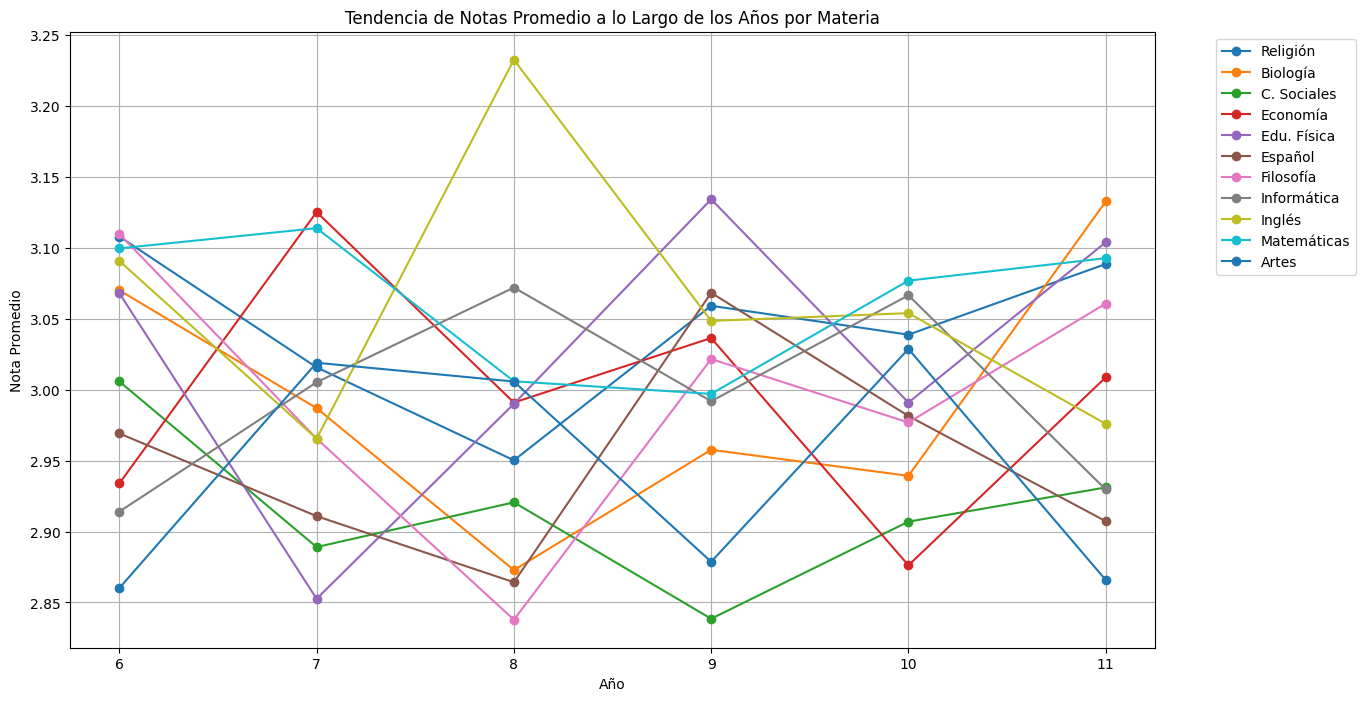

In [ ]:
import matplotlib.pyplot as plt

# Calcular el promedio de notas por materia y año
df_promedio_notas = df_expanded.groupby(['año', 'materia'])['nota'].mean().reset_index()

# Asegurar que la columna 'año' sea numérica
df_promedio_notas['año'] = pd.to_numeric(df_promedio_notas['año'])

# Ordenar los datos por año
df_promedio_notas = df_promedio_notas.sort_values(by='año')

# Configuración para mostrar los gráficos
plt.figure(figsize=(14, 8))

# Gráfico de líneas para la tendencia de notas a lo largo de los años
for materia in df_promedio_notas['materia'].unique():
    plt.plot(df_promedio_notas[df_promedio_notas['materia'] == materia]['año'],
             df_promedio_notas[df_promedio_notas['materia'] == materia]['nota'],
             marker='o', label=materia)

plt.title('Tendencia de Notas Promedio a lo Largo de los Años por Materia')
plt.xlabel('Año')
plt.ylabel('Nota Promedio')
plt.xticks(df_promedio_notas['año'].unique())  # Asegurarse de que todos los años estén en el eje x
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


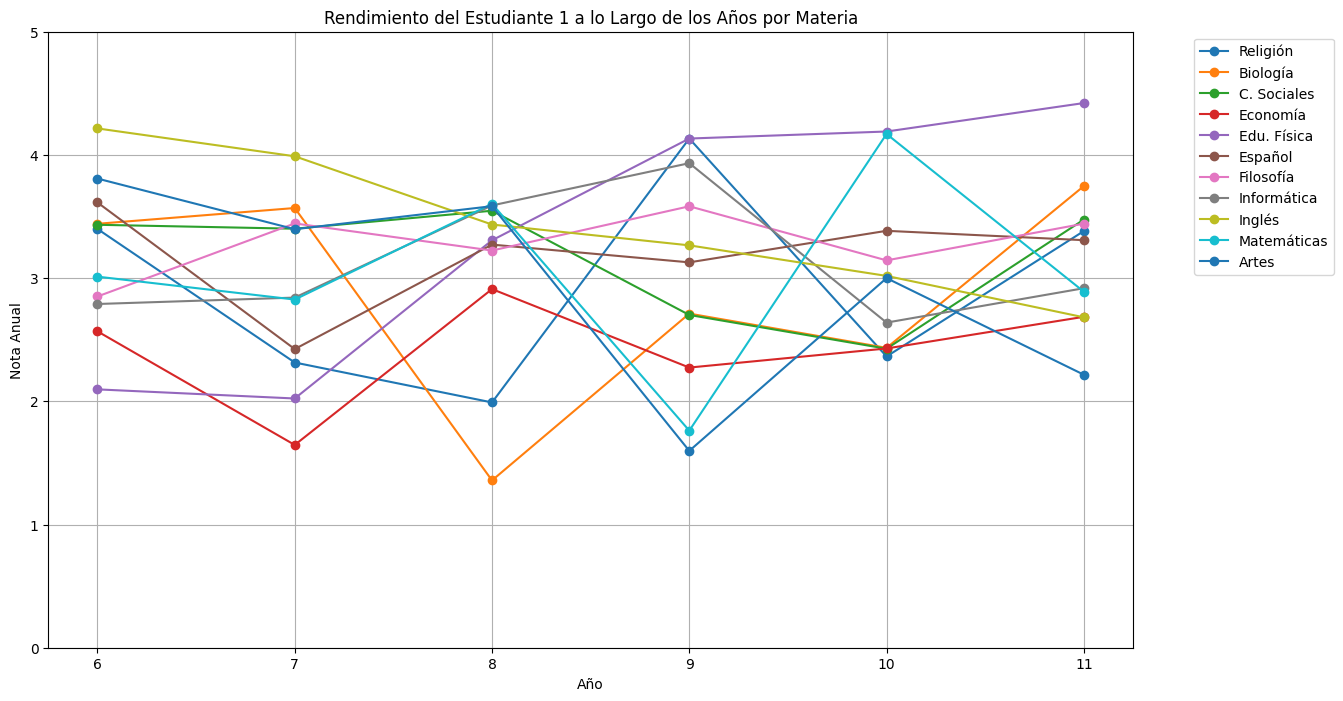

In [ ]:
import matplotlib.pyplot as plt

#queremos ver el rendimiento del estudiante con id_estudiante = 1
id_estudiante = 1

# Filtrar el dataframe para el estudiante específico
df_estudiante = df_expanded[df_expanded['id_estudiante'] == id_estudiante].copy()

# Calcular la nota ponderada para cada registro
df_estudiante['nota_ponderada'] = df_estudiante.apply(
    lambda row: row['nota'] * 0.6 if row['periodo'] in ['Periodo 1', 'Periodo 2'] else row['nota'] * 0.4, axis=1)

# Agrupar por año y materia para calcular la nota anual correcta
def calcular_nota_anual(grupo):
    # Calcular la nota ponderada sumando las ponderaciones de los periodos y nota final
    nota_anual = (grupo[grupo['periodo'] == 'Periodo 1']['nota'].values[0] * 0.3 +
                  grupo[grupo['periodo'] == 'Periodo 2']['nota'].values[0] * 0.3 +
                  grupo[grupo['periodo'] == 'Nota Final']['nota'].values[0] * 0.4)
    return nota_anual

df_anual = df_estudiante.groupby(['año', 'materia']).apply(calcular_nota_anual).reset_index(name='nota_anual')

# Asegurar que la columna 'año' sea numérica
df_anual['año'] = pd.to_numeric(df_anual['año'])

# Ordenar los datos por año
df_anual = df_anual.sort_values(by='año')

# Configuración para mostrar los gráficos
plt.figure(figsize=(14, 8))

# Gráfico de líneas para el rendimiento del estudiante en todas las materias a lo largo de los años
for materia in df_anual['materia'].unique():
    plt.plot(df_anual[df_anual['materia'] == materia]['año'],
             df_anual[df_anual['materia'] == materia]['nota_anual'],
             marker='o', label=materia)

plt.title(f'Rendimiento del Estudiante {id_estudiante} a lo Largo de los Años por Materia')
plt.xlabel('Año')
plt.ylabel('Nota Anual')
plt.ylim(0, 5)  # Asegurarse de que el rango de notas sea de 0 a 5
plt.xticks(df_anual['año'].unique())  # Asegurarse de que todos los años estén en el eje x
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



In [ ]:
import pandas as pd
import json

# Cargar el archivo
file_path = '/content/db/bd_2.csv'
df = pd.read_csv(file_path)

# Crear una lista para almacenar los dataframes expandidos
df_list = []

# Iterar sobre cada fila en el dataframe original
for index, row in df.iterrows():
    notas_detalle_list = json.loads(row['notas_detalle'])
    df_notas = pd.DataFrame(notas_detalle_list)
    df_notas['id_estudiante'] = row['id_estudiante']
    df_list.append(df_notas)

# Concatenar todos los dataframes en uno solo
df_expanded = pd.concat(df_list, ignore_index=True)

# Crear un dataframe pivoteado nuevamente
df_pivot = df_expanded.pivot_table(
    index='id_estudiante',
    columns=['materia', 'año', 'periodo'],
    values='nota',
    aggfunc='first'
)

# Filtrar las columnas para excluir las que contienen "Nota Final"
filtered_columns = [col for col in df_pivot.columns if 'Nota Final' not in col]
df_pivot_filtered = df_pivot[filtered_columns]

# Renombrar las columnas con el formato deseado
df_pivot_filtered.columns = [f"{materia}_{año}_{'1' if periodo == 'Periodo 1' else '2' if periodo == 'Periodo 2' else '3'}"
                             for materia, año, periodo in df_pivot_filtered.columns]
df_pivot_filtered.reset_index(inplace=True)

# Guardar el dataframe resultante en un archivo CSV
df_pivot_filtered.to_csv('/content/db/bd_expandido.csv', index=False)

print("DataFrame guardado como bd_expandido.csv")


DataFrame guardado como bd_expandido.csv


In [ ]:
import pandas as pd

# Cargar el archivo
file_path = '/content/db/bd_expandido.csv'
df2 = pd.read_csv(file_path)

# Diccionario de materias
materias_dict_invertido = {
    "Matemáticas": 1,
    "Español": 2,
    "Biología": 3,
    "C. Sociales": 4,
    "Inglés": 5,
    "Edu. Física": 6,
    "Informática": 7,
    "Artes": 8,
    "Religión": 9,
    "Filosofía": 10,
    "Economía": 11
}

# Función para transformar nombres de columnas
def transformar_nombre_columna(columna):
    partes = columna.split('_')
    if partes[0] in materias_dict_invertido:
        return f"{materias_dict_invertido[partes[0]]}_{partes[1]}_{partes[2]}"
    return columna

# Aplicar la transformación a las columnas
df2.columns = [transformar_nombre_columna(col) for col in df2.columns]

# Tabla de ponderación
tabla_ponderacion = pd.DataFrame({
    "Materias" : [1,2,3,4,5,6,7,8,9,10,11],
    "Ing. de Sistemas Afines"   :[0.2,0.05,0.1,0.05,0.15,0,0.25,0.05,0,0.05,0.1],
    "Ing. Industria"            :[0.2,0.1,0.15,0.1,0.1,0,0.15,0.05,0,0.05,0.1],
    "Medicina"                  :[0.1,0.15,0.25,0.05,0.05,0.05,0.05,0.05,0,0.1,0.15],
    "Enfermería"                :[0.1,0.1,0.25,0.05,0.05,0.05,0.05,0.1,0,0.1,0.15],
    "Derecho"                   :[0.05,0.25,0.05,0.25,0,0,0.05,0.05,0.05,0.15,0.1],
    "Adm Empresas "             :[0.15,0.1,0.05,0.15,0.1,0,0.1,0.05,0,0.1,0.2],
    "Psicología"                :[0.1,0.15,0.1,0.2,0.1,0,0.05,0.05,0.05,0.15,0.05],
    "Contaduría"                :[0.15,0.1,0.05,0.15,0.1,0,0.1,0.05,0,0.05,0.25],
    "Ing Ambiental"             :[0.15,0.1,0.25,0.1,0.1,0,0.1,0.05,0,0.05,0.1],
    "Ing Electrónica"           :[0.25,0.05,0.2,0.05,0.1,0,0.2,0.05,0,0.05,0.05],
    "Marketing Digital"         :[0.1,0.1,0.05,0.15,0.15,0,0.2,0.05,0,0.05,0.15],
    "Ing Mecánica "             :[0.25,0.05,0.2,0.05,0.1,0,0.15,0.05,0,0.05,0.1],
    "Arquitectura"              :[0.15,0.1,0.1,0.05,0.1,0,0.15,0.2,0,0.05,0.1],
    "Educación(STEM)"           :[0.2,0.1,0.2,0.1,0.1,0,0.15,0.05,0,0.05,0.05],
    "Economía-finanzas"                  :[0.15,0.1,0.05,0.2,0.1,0,0.05,0.05,0,0.1,0.2],
    "Finanzas RelacionesInte"   :[0.1,0.1,0.05,0.25,0.15,0,0.1,0.05,0,0.1,0.1],
    "Ing Agronómica"            :[0.15,0.1,0.25,0.1,0.1,0,0.1,0.05,0,0.05,0.1],
    "Biología y Biotecnología " :[0.1,0.1,0.3,0.05,0.1,0,0.1,0.05,0,0.1,0.1],
    "Diseño Gráfico Industrial ":[0.1,0.1,0.05,0.05,0.1,0,0.2,0.25,0,0.05,0.1],
    "Turismo y Hospitalidad "   :[0.05,0.15,0.05,0.2,0.15,0,0.1,0.1,0,0.1,0.1]
})

# Años y períodos disponibles en los datos
anios = [6, 7, 8, 9, 10, 11]
periodos = [1, 2, 3]

# Crear un nuevo dataframe para almacenar las columnas ponderadas
resultados_list = []

# Iterar sobre los años y períodos para calcular las columnas ponderadas
for anio in anios:
    for periodo in periodos:
        columnas_anio_periodo = [col for col in df2.columns if f'_{anio}_{periodo}' in col]
        for carrera in tabla_ponderacion.columns[1:]:
            columna_resultado = f'{carrera}_{anio}_{periodo}'
            resultado_serie = pd.Series(0, index=df2.index, name=columna_resultado)
            for col in columnas_anio_periodo:
                materia_codigo = int(col.split('_')[0])
                ponderacion = tabla_ponderacion.loc[tabla_ponderacion['Materias'] == materia_codigo, carrera].values[0]
                resultado_serie += df2[col] * ponderacion
            resultados_list.append(resultado_serie)

# Combinar el dataframe original con el dataframe de resultados ponderados
df_ponderado = pd.concat([df2] + resultados_list, axis=1)

# Guardar el dataframe ponderado en un nuevo archivo CSV
df_ponderado.to_csv('/content/db/bd_expandido_ponderado.csv', index=False)

# Mostrar las primeras filas del dataframe resultante para ver la estructura
df_ponderado.head()


,id_estudiante,8_10_1,8_10_2,8_10_3,8_11_1,8_11_2,8_11_3,8_6_1,8_6_2,8_6_3,...,Marketing Digital_11_3,Ing Mecánica _11_3,Arquitectura_11_3,Educación(STEM)_11_3,Economía-finanzas_11_3,Finanzas RelacionesInte_11_3,Ing Agronómica_11_3,Biología y Biotecnología _11_3,Diseño Gráfico Industrial _11_3,Turismo y Hospitalidad _11_3
0,1,3.98,2.06,2.97,1.24,2.16,2.26,2.46,4.58,4.81,...,3.4410,3.313,3.0900,3.3165,3.2835,3.2755,3.377,3.2930,3.1195,3.1280
1,2,2.95,4.78,2.90,1.89,3.73,1.25,3.44,2.43,2.93,...,2.3240,2.698,2.3140,2.4620,2.5250,2.2510,2.397,2.2260,2.1090,2.0850
2,3,2.03,3.74,4.90,2.46,1.08,3.97,4.08,1.38,2.56,...,3.3955,3.347,3.4975,3.1520,3.4145,3.1490,3.087,3.1205,3.6360,3.1775
3,4,2.75,4.27,4.86,4.60,4.27,2.69,1.63,2.77,4.00,...,3.0030,3.005,2.9365,3.1235,3.0805,3.2125,2.980,2.8480,2.9080,3.0990
4,5,2.04,1.97,1.01,2.27,1.27,4.15,2.36,1.26,4.19,...,2.5810,2.613,2.8905,2.5330,2.7825,2.5185,2.694,2.8780,2.9650,2.6940


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo
file_path_ponderado = '/content/db/bd_expandido_ponderado.csv'
df_ponderado_resultados = pd.read_csv(file_path_ponderado)

# Definir el diccionario de materias (asegúrate de que materias_dict_invertido esté definido correctamente)
materias_dict_invertido = {
    1:"Matemáticas",
    2:"Español",
    3:"Biología",
    4:"C-Sociales",
    5:"Inglés",
    6:"Edu-Física",
    7:"Informática",
    8:"Artes",
    9:"Religión",
    10:"Filosofía",
    11:"Economía",
    # Asegúrate de incluir todas las materias correspondientes
}

# Cambiar los nombres de las columnas
def cambiar_nombres_columnas(columna):
    parts = columna.split('_')
    if parts[0].isdigit():
        materia_num = int(parts[0])
        materia_nombre = materias_dict_invertido.get(materia_num, f'Materia{materia_num}')
        return f"{materia_nombre}_{parts[1]}_{parts[2]}"
    return columna

df_ponderado_resultados.columns = [cambiar_nombres_columnas(col) for col in df_ponderado_resultados.columns]

# Guardar el DataFrame con los nombres de columnas actualizados
df_ponderado_resultados.to_csv('/content/db/bd_ponderado_nombres.csv', index=False)
df_ponderado_resultados.shape

(40, 559)

<ipython-input-421-1c51ad718307>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_estudiante_transposed, x='Puntuacion', y='Carrera', palette='viridis')


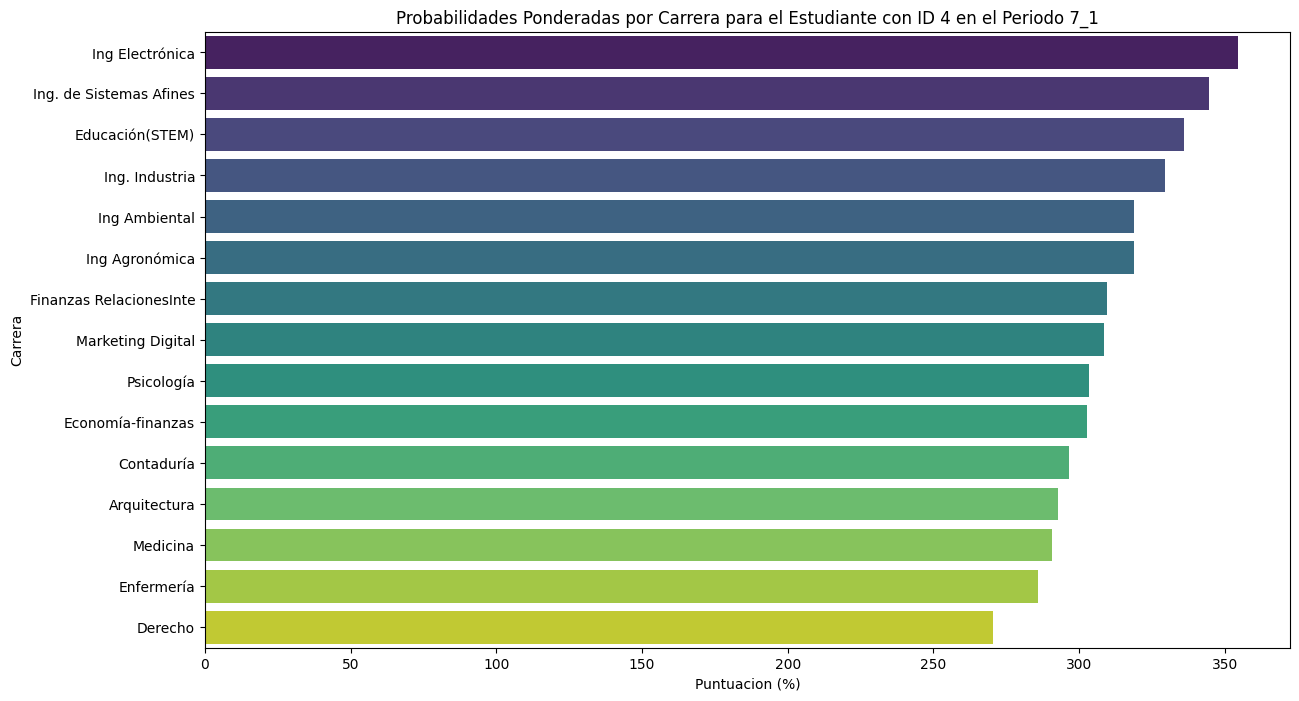

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar el DataFrame procesado
df = pd.read_csv('/content/db/bd_ponderado_nombres.csv')


# Seleccionar las columnas relacionadas con las carreras
carreras = ["Ing. de Sistemas Afines", "Ing. Industria", "Medicina", "Enfermería", "Derecho",
            "Adm Empresas", "Psicología", "Contaduría", "Ing Ambiental", "Ing Electrónica",
            "Marketing Digital", "Ing Mecánica", "Arquitectura", "Educación(STEM)", "Economía-finanzas",
            "Finanzas RelacionesInte", "Ing Agronómica", "Biología y Biotecnología",
            "Diseño Gráfico Industrial", "Turismo y Hospitalidad"]

# Seleccionar un periodo específico
periodo_especifico = '7_1'
carreras_periodo_seleccionado = [f"{carrera}_{periodo_especifico}" for carrera in carreras]

# Verificar qué columnas están presentes en el DataFrame
carreras_periodo_presentes = [col for col in carreras_periodo_seleccionado if col in df.columns]

# Filtrar los datos para el estudiante específico
id_estudiante = 4
df_estudiante = df[df['id_estudiante'] == id_estudiante][carreras_periodo_presentes]

# Escalar las probabilidades de 0 a 100%
df_estudiante = df_estudiante * 100

# Transponer para facilitar la visualización
df_estudiante_transposed = df_estudiante.T
df_estudiante_transposed.columns = ['Puntuacion']
df_estudiante_transposed.index.name = 'Carrera'
df_estudiante_transposed.reset_index(inplace=True)

# Extraer la información de la carrera
df_estudiante_transposed['Carrera'] = df_estudiante_transposed['Carrera'].apply(lambda x: x.replace(f"_{periodo_especifico}", ""))

# Ordenar las carreras por la puntuación para una mejor visualización
df_estudiante_transposed = df_estudiante_transposed.sort_values(by='Puntuacion', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(data=df_estudiante_transposed, x='Puntuacion', y='Carrera', palette='viridis')
plt.title(f'Probabilidades Ponderadas por Carrera para el Estudiante con ID {id_estudiante} en el Periodo {periodo_especifico}')
plt.xlabel('Puntuacion (%)')
plt.ylabel('Carrera')
plt.show()

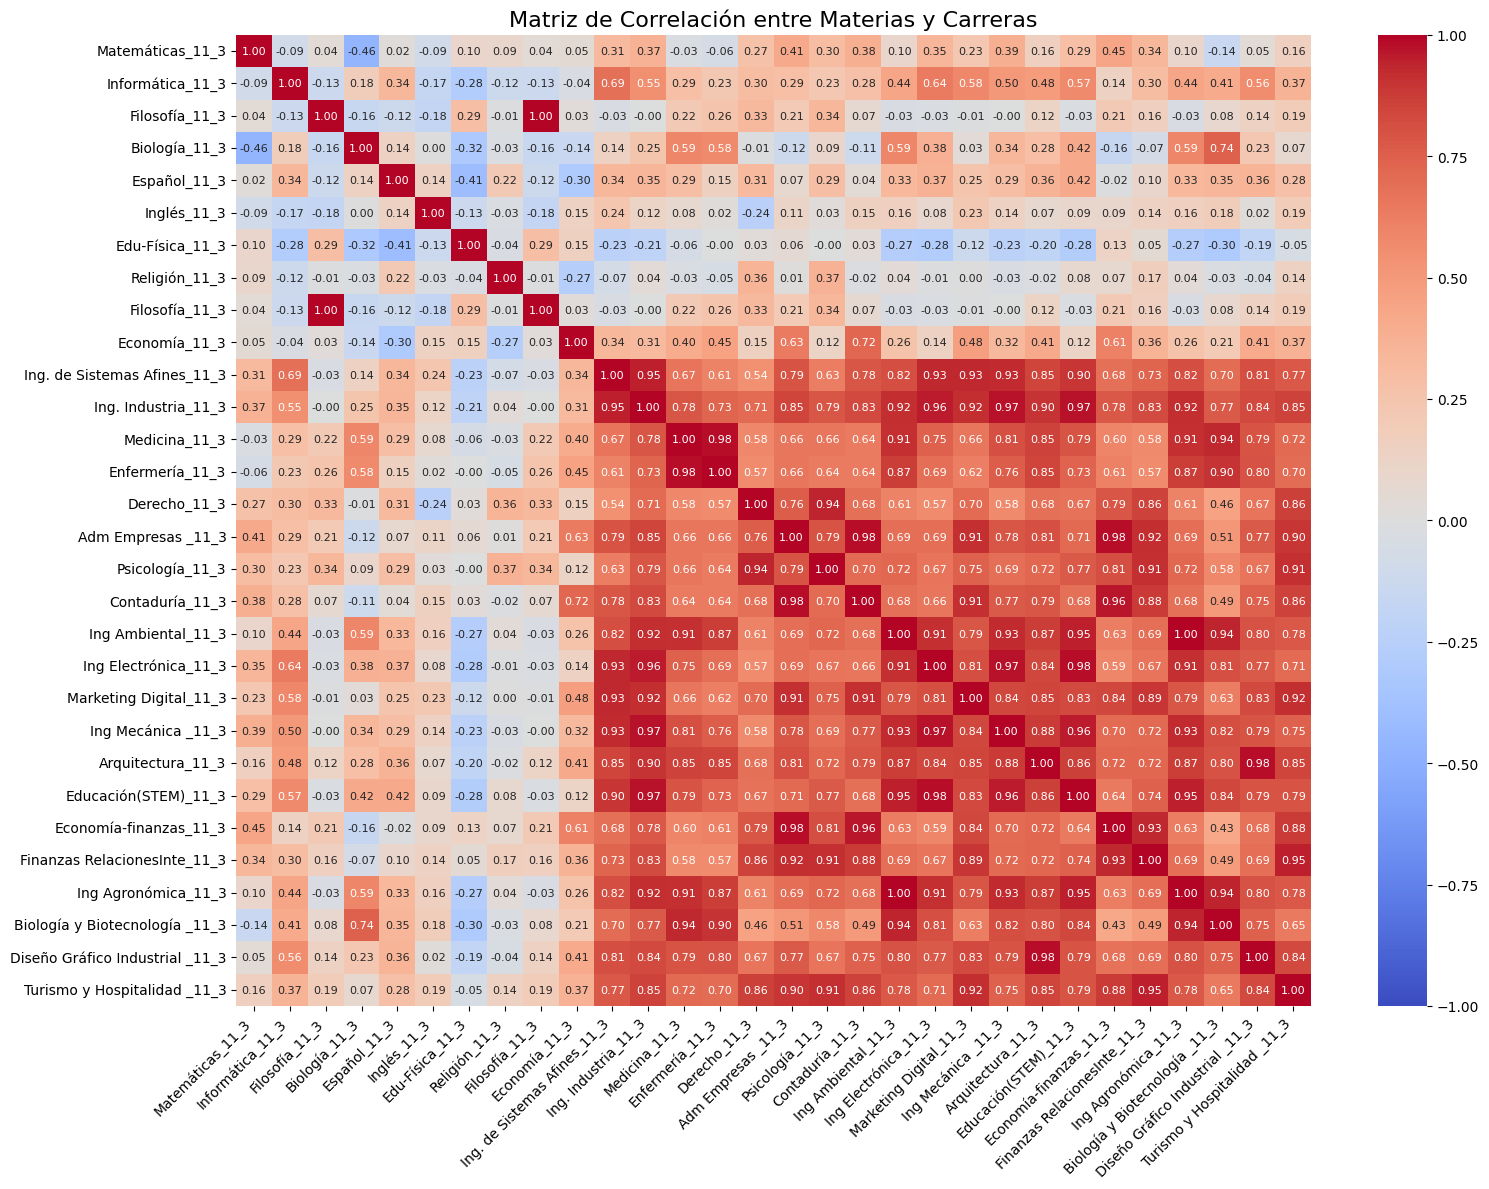

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar algunas materias y carreras para ilustrar
carreras_seleccionadas = [col for col in df.columns if '11_3' in col and any(career in col for career in carreras)]
materias_seleccionadas = ['Matemáticas_11_3', 'Informática_11_3', 'Filosofía_11_3', 'Biología_11_3', 'Español_11_3', 'Inglés_11_3', 'Edu-Física_11_3', 'Religión_11_3', 'Filosofía_11_3', 'Economía_11_3']

df_correlacion = df[materias_seleccionadas + carreras_seleccionadas].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(df_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8}, fmt=".2f")
plt.title('Matriz de Correlación entre Materias y Carreras', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()  # Ajusta el layout para que se vea mejor
plt.show()



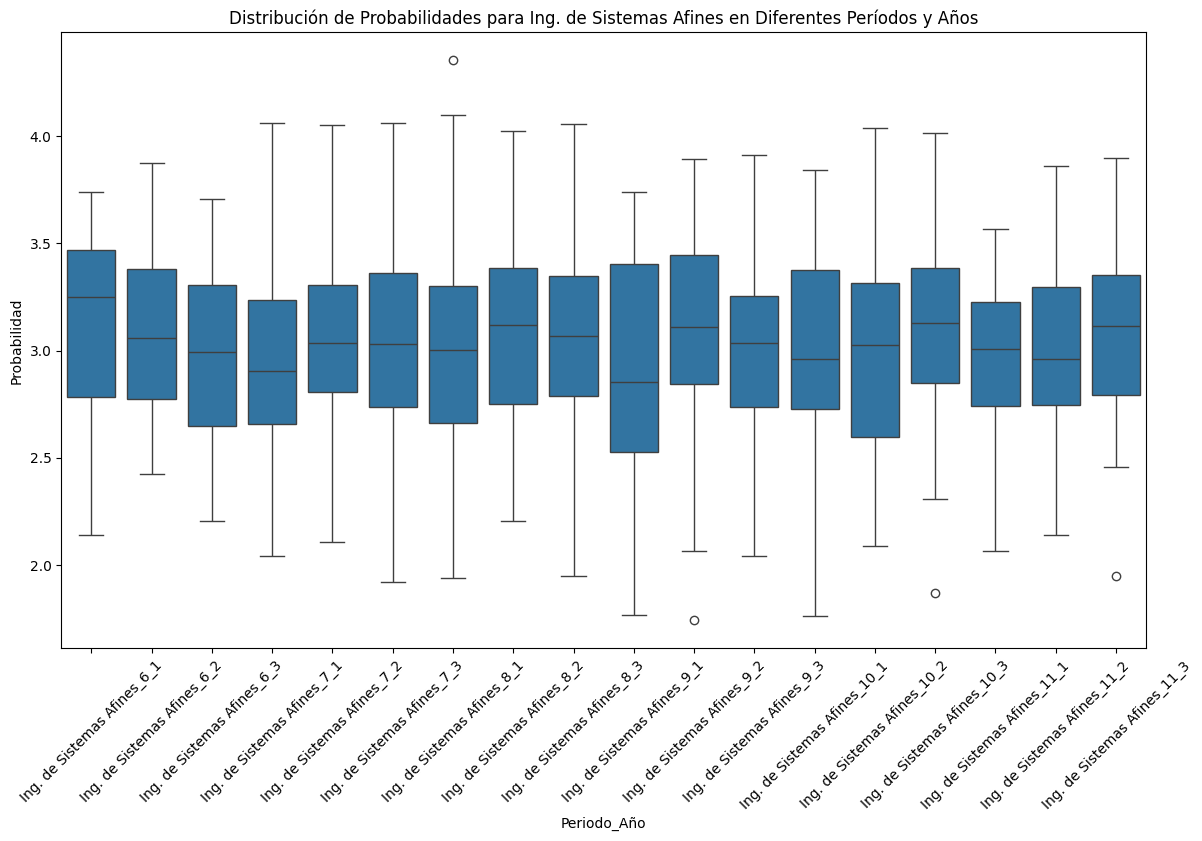

In [ ]:
# Seleccionar una carrera y mostrar su evolución en los diferentes periodos y años
carrera_seleccionada = 'Ing. de Sistemas Afines'
carrera_cols = [col for col in df.columns if carrera_seleccionada in col]
df_carrera = df[carrera_cols].melt(var_name='Periodo_Año', value_name='Probabilidad')

plt.figure(figsize=(14, 8))
sns.boxplot(x='Periodo_Año', y='Probabilidad', data=df_carrera)
plt.title(f'Distribución de Probabilidades para {carrera_seleccionada} en Diferentes Períodos y Años')
plt.xticks(rotation=45)
plt.show()


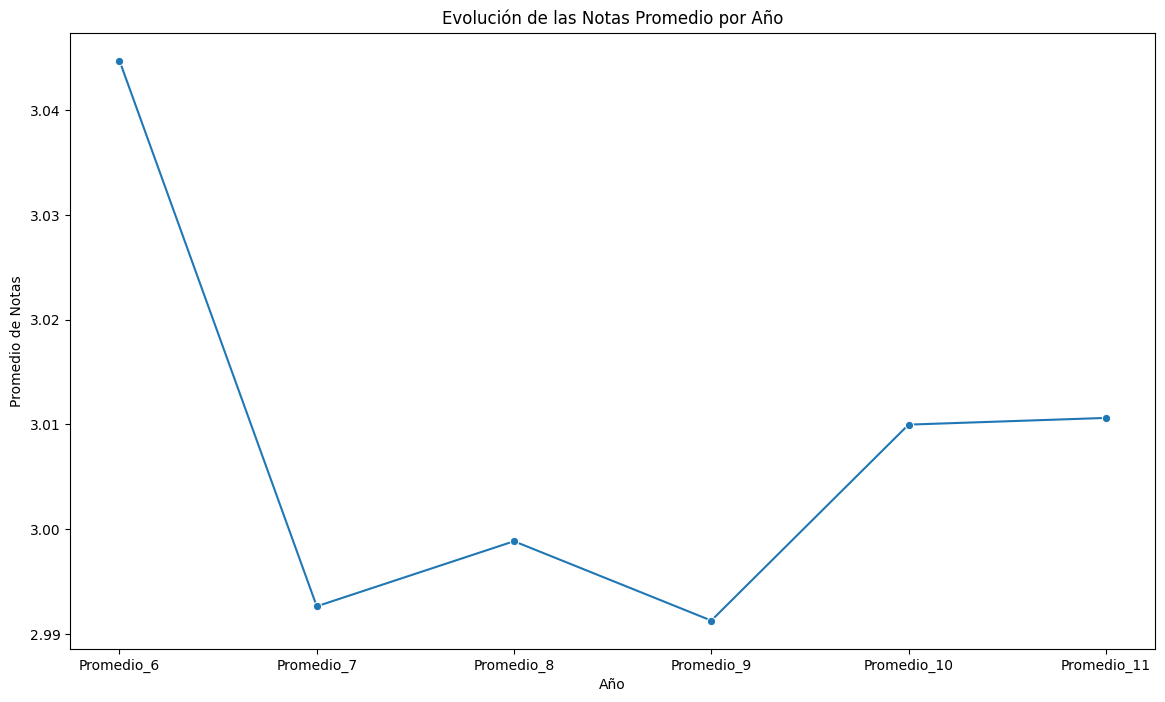

In [ ]:
# Calcular el promedio de notas por año
df['Promedio_6'] = df[[col for col in df.columns if '_6_' in col]].mean(axis=1)
df['Promedio_7'] = df[[col for col in df.columns if '_7_' in col]].mean(axis=1)
df['Promedio_8'] = df[[col for col in df.columns if '_8_' in col]].mean(axis=1)
df['Promedio_9'] = df[[col for col in df.columns if '_9_' in col]].mean(axis=1)
df['Promedio_10'] = df[[col for col in df.columns if '_10_' in col]].mean(axis=1)
df['Promedio_11'] = df[[col for col in df.columns if '_11_' in col]].mean(axis=1)

promedios_por_año = df[['Promedio_6', 'Promedio_7', 'Promedio_8', 'Promedio_9', 'Promedio_10', 'Promedio_11']].mean()

plt.figure(figsize=(14, 8))
sns.lineplot(data=promedios_por_año, marker='o')
plt.title('Evolución de las Notas Promedio por Año')
plt.xlabel('Año')
plt.ylabel('Promedio de Notas')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar el DataFrame procesado
df = pd.read_csv('/content/db/bd_ponderado_nombres.csv')
print(df.shape)


(40, 559)


In [ ]:
# Listar todas las columnas del dataframe
columns = df.columns.tolist()

# Listas de carreras y materias
carreras_list = [
    "Ing. de Sistemas Afines", "Ing. Industria", "Medicina", "Enfermería", "Derecho",
    "Adm Empresas", "Psicología", "Contaduría", "Ing Ambiental", "Ing Electrónica",
    "Marketing Digital", "Ing Mecánica", "Arquitectura", "Educación(STEM)", "Economía-finanzas",
    "Finanzas RelacionesInte", "Ing Agronómica", "Biología y Biotecnología",
    "Diseño Gráfico Industrial", "Turismo y Hospitalidad"
]

materias_list = [
    "Matemáticas", "Español", "Biología", "C-Sociales", "Inglés", "Edu-Física",
    "Informática", "Artes", "Religión", "Filosofía", "Economía"
]

# Identificar columnas de carreras
carreras = [col for col in columns if any(carrera in col for carrera in carreras_list)]

# Crear subconjuntos de datos por periodo y año
carreras_por_periodo = {}

# Agrupar columnas de carreras por año y periodo
for col in carreras:
    parts = col.split('_')
    if len(parts) == 3:
        key = f"{parts[1]}_{parts[2]}"
        if key not in carreras_por_periodo:
            carreras_por_periodo[key] = []
        carreras_por_periodo[key].append(col)

# Imprimir los grupos de carreras por periodo y año
print("Carreras por periodo y año:")
for key, cols in carreras_por_periodo.items():
    print(f"Año_Periodo {key}: {len(cols)} columnas")

# Crear una función para obtener la carrera predominante en cada periodo y año
def obtener_carrera_predominante(row, carreras_cols):
    max_valor = 0
    carrera_predominante = ""
    for col in carreras_cols:
        if row[col] > max_valor:
            max_valor = row[col]
            carrera_predominante = col
    return carrera_predominante, max_valor

# Añadir columnas de carrera predominante para cada periodo y año
for key, cols in carreras_por_periodo.items():
    df[f'carrera_predominante_{key}'], df[f'puntaje_carrera_predominante_{key}'] = zip(*df.apply(lambda row: obtener_carrera_predominante(row, cols), axis=1))

# Mostrar las primeras filas del dataframe modificado
print(df.head())

Carreras por periodo y año:
Año_Periodo 6_1: 20 columnas
Año_Periodo 6_2: 20 columnas
Año_Periodo 6_3: 20 columnas
Año_Periodo 7_1: 20 columnas
Año_Periodo 7_2: 20 columnas
Año_Periodo 7_3: 20 columnas
Año_Periodo 8_1: 20 columnas
Año_Periodo 8_2: 20 columnas
Año_Periodo 8_3: 20 columnas
Año_Periodo 9_1: 20 columnas
Año_Periodo 9_2: 20 columnas
Año_Periodo 9_3: 20 columnas
Año_Periodo 10_1: 20 columnas
Año_Periodo 10_2: 20 columnas
Año_Periodo 10_3: 20 columnas
Año_Periodo 11_1: 20 columnas
Año_Periodo 11_2: 20 columnas
Año_Periodo 11_3: 20 columnas
   id_estudiante  Artes_10_1  Artes_10_2  Artes_10_3  Artes_11_1  Artes_11_2  \
0              1        3.98        2.06        2.97        1.24        2.16   
1              2        2.95        4.78        2.90        1.89        3.73   
2              3        2.03        3.74        4.90        2.46        1.08   
3              4        2.75        4.27        4.86        4.60        4.27   
4              5        2.04        1.97    

In [ ]:

column_names = df.columns.tolist()
print(column_names)
df.shape

['id_estudiante', 'Artes_10_1', 'Artes_10_2', 'Artes_10_3', 'Artes_11_1', 'Artes_11_2', 'Artes_11_3', 'Artes_6_1', 'Artes_6_2', 'Artes_6_3', 'Artes_7_1', 'Artes_7_2', 'Artes_7_3', 'Artes_8_1', 'Artes_8_2', 'Artes_8_3', 'Artes_9_1', 'Artes_9_2', 'Artes_9_3', 'Biología_10_1', 'Biología_10_2', 'Biología_10_3', 'Biología_11_1', 'Biología_11_2', 'Biología_11_3', 'Biología_6_1', 'Biología_6_2', 'Biología_6_3', 'Biología_7_1', 'Biología_7_2', 'Biología_7_3', 'Biología_8_1', 'Biología_8_2', 'Biología_8_3', 'Biología_9_1', 'Biología_9_2', 'Biología_9_3', 'C-Sociales_10_1', 'C-Sociales_10_2', 'C-Sociales_10_3', 'C-Sociales_11_1', 'C-Sociales_11_2', 'C-Sociales_11_3', 'C-Sociales_6_1', 'C-Sociales_6_2', 'C-Sociales_6_3', 'C-Sociales_7_1', 'C-Sociales_7_2', 'C-Sociales_7_3', 'C-Sociales_8_1', 'C-Sociales_8_2', 'C-Sociales_8_3', 'C-Sociales_9_1', 'C-Sociales_9_2', 'C-Sociales_9_3', 'Economía_10_1', 'Economía_10_2', 'Economía_10_3', 'Economía_11_1', 'Economía_11_2', 'Economía_11_3', 'Economía_6_1', 

(40, 595)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Columns: 595 entries, id_estudiante to puntaje_carrera_predominante_11_3
dtypes: float64(576), int64(1), object(18)
memory usage: 186.1+ KB


In [ ]:
df.to_csv('/content/db/bd_columnas_predominantes.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar el DataFrame procesado
df = pd.read_csv('/content/db/bd_columnas_predominantes.csv')
print(df.shape)

(40, 595)


In [ ]:
# prompt: el nombre de las columnas df

column_names = df.columns.tolist()
print(column_names)


['id_estudiante', 'Artes_10_1', 'Artes_10_2', 'Artes_10_3', 'Artes_11_1', 'Artes_11_2', 'Artes_11_3', 'Artes_6_1', 'Artes_6_2', 'Artes_6_3', 'Artes_7_1', 'Artes_7_2', 'Artes_7_3', 'Artes_8_1', 'Artes_8_2', 'Artes_8_3', 'Artes_9_1', 'Artes_9_2', 'Artes_9_3', 'Biología_10_1', 'Biología_10_2', 'Biología_10_3', 'Biología_11_1', 'Biología_11_2', 'Biología_11_3', 'Biología_6_1', 'Biología_6_2', 'Biología_6_3', 'Biología_7_1', 'Biología_7_2', 'Biología_7_3', 'Biología_8_1', 'Biología_8_2', 'Biología_8_3', 'Biología_9_1', 'Biología_9_2', 'Biología_9_3', 'C-Sociales_10_1', 'C-Sociales_10_2', 'C-Sociales_10_3', 'C-Sociales_11_1', 'C-Sociales_11_2', 'C-Sociales_11_3', 'C-Sociales_6_1', 'C-Sociales_6_2', 'C-Sociales_6_3', 'C-Sociales_7_1', 'C-Sociales_7_2', 'C-Sociales_7_3', 'C-Sociales_8_1', 'C-Sociales_8_2', 'C-Sociales_8_3', 'C-Sociales_9_1', 'C-Sociales_9_2', 'C-Sociales_9_3', 'Economía_10_1', 'Economía_10_2', 'Economía_10_3', 'Economía_11_1', 'Economía_11_2', 'Economía_11_3', 'Economía_6_1', 

In [ ]:
import pandas as pd

# Carga el dataset
file_path = '/content/db/bd_columnas_predominantes.csv'
df = pd.read_csv(file_path)

# Función para dividir el dataset por año y período
def dividir_por_anio_periodo(df):
    # Obtiene las columnas únicas sin el identificador del estudiante
    columnas = [col for col in df.columns if col != 'id_estudiante']

    # Encuentra todos los años y períodos disponibles
    periodos = sorted(set(col.split('_')[-1] for col in columnas))
    anios = sorted(set(col.split('_')[-2] for col in columnas))

    # Diccionario para almacenar los diferentes datasets
    datasets = {}

    for anio in anios:
        for periodo in periodos:
            # Filtrar columnas por año y período
            columnas_filtradas = ['id_estudiante'] + [col for col in columnas if f'_{anio}_{periodo}' in col]
            # Crear un nuevo DataFrame para el año y período específico
            df_filtrado = df[columnas_filtradas].copy()
            # Guardar el DataFrame en el diccionario
            datasets[f'{anio}_{periodo}'] = df_filtrado

    return datasets

# Aplicar la función para dividir el dataset
datasets_divididos = dividir_por_anio_periodo(df)

# Ejemplo: mostrar el dataset del año 6 y período 1
datasets_divididos['6_1'].head()

# Puedes guardar cada dataset en un archivo CSV si lo necesitas
for key, dataset in datasets_divididos.items():
    dataset.to_csv(f'dataset_{key}.csv', index=False)


In [ ]:
import pandas as pd

# Carga el dataset
file_path = '/content/dataset_6_1.csv'
df6_1 = pd.read_csv(file_path)

In [ ]:
df6_1

,id_estudiante,Artes_6_1,Biología_6_1,C-Sociales_6_1,Economía_6_1,Edu-Física_6_1,Español_6_1,Filosofía_6_1,Informática_6_1,Inglés_6_1,...,Arquitectura_6_1,Educación(STEM)_6_1,Economía-finanzas_6_1,Finanzas RelacionesInte_6_1,Ing Agronómica_6_1,Biología y Biotecnología _6_1,Diseño Gráfico Industrial _6_1,Turismo y Hospitalidad _6_1,carrera_predominante_6_1,puntaje_carrera_predominante_6_1
0,1,2.46,4.53,2.32,4.00,3.56,3.29,1.99,2.16,4.33,...,3.3365,3.5665,3.3725,3.1830,3.6550,3.6350,3.1110,3.1245,Ing Mecánica _6_1,3.7160
1,2,3.44,1.86,1.74,1.03,3.28,2.90,3.41,3.68,1.30,...,2.7300,2.6100,2.2875,2.3460,2.3960,2.3980,2.8185,2.4015,Diseño Gráfico Industrial _6_1,2.8185
2,3,4.08,4.68,4.58,1.17,1.09,3.85,1.75,4.28,1.69,...,3.5585,3.8000,3.1760,3.3715,3.6635,3.5410,3.5275,3.3240,Ing Electrónica_6_1,3.8075
3,4,1.63,1.94,3.84,4.74,1.65,3.04,4.62,3.63,4.65,...,3.2180,3.2850,3.7945,3.7640,3.2750,3.2485,3.2215,3.6430,Economía-finanzas_6_1,3.7945
4,5,2.36,4.59,3.94,2.86,1.81,1.47,3.39,4.51,2.11,...,3.3635,3.7710,3.3755,3.3690,3.6695,3.6230,3.2290,3.1150,Ing Electrónica_6_1,3.9745
5,6,3.14,1.64,2.30,2.02,3.43,3.77,2.81,2.57,4.81,...,3.2025,3.1460,3.0800,3.1255,2.9640,2.8350,3.1695,3.1195,Ing. de Sistemas Afines_6_1,3.2770
6,7,4.85,3.86,4.13,5.00,4.46,1.30,1.51,1.70,2.78,...,3.3695,3.1740,3.4740,3.2150,3.3425,3.2150,3.3145,3.1265,Contaduría_6_1,3.5270
7,8,1.47,4.64,1.96,4.19,4.13,2.61,4.04,3.12,2.37,...,3.0565,3.3930,3.2070,2.9560,3.4740,3.6055,2.8495,2.8575,Medicina_6_1,3.6455
8,9,2.98,3.48,2.88,3.13,2.02,2.75,3.51,3.12,4.93,...,3.2505,3.2850,3.2380,3.3255,3.3135,3.3730,3.2355,3.3220,Biología y Biotecnología _6_1,3.3730
9,10,2.52,1.27,3.35,1.09,4.07,2.80,1.51,4.43,2.74,...,2.4370,2.3775,2.2395,2.5780,2.1955,2.0885,2.6425,2.5980,Marketing Digital_6_1,2.6650


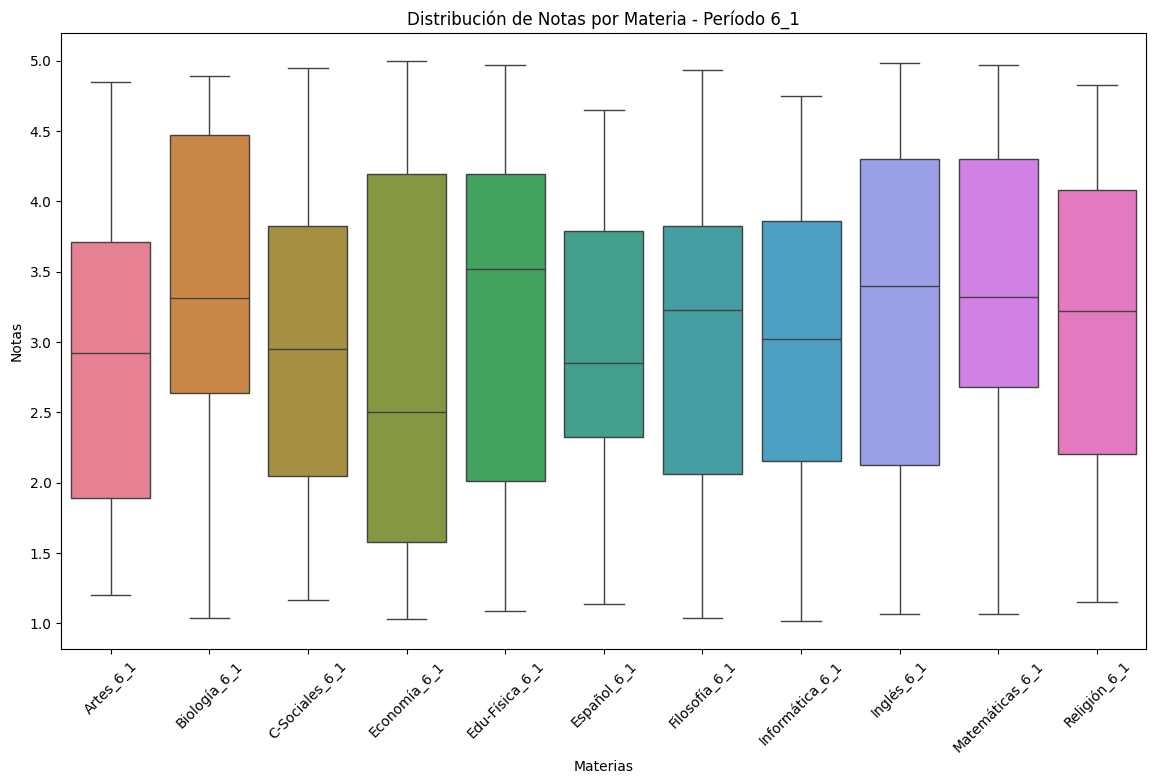

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Listamos las columnas de materias
materias = ['Artes_6_1', 'Biología_6_1', 'C-Sociales_6_1', 'Economía_6_1',
            'Edu-Física_6_1', 'Español_6_1', 'Filosofía_6_1', 'Informática_6_1',
            'Inglés_6_1', 'Matemáticas_6_1', 'Religión_6_1']

# Creamos un boxplot para cada materia
plt.figure(figsize=(14, 8))
sns.boxplot(data=df6_1[materias])
plt.title('Distribución de Notas por Materia - Período 6_1')
plt.xticks(rotation=45)
plt.ylabel('Notas')
plt.xlabel('Materias')
plt.show()


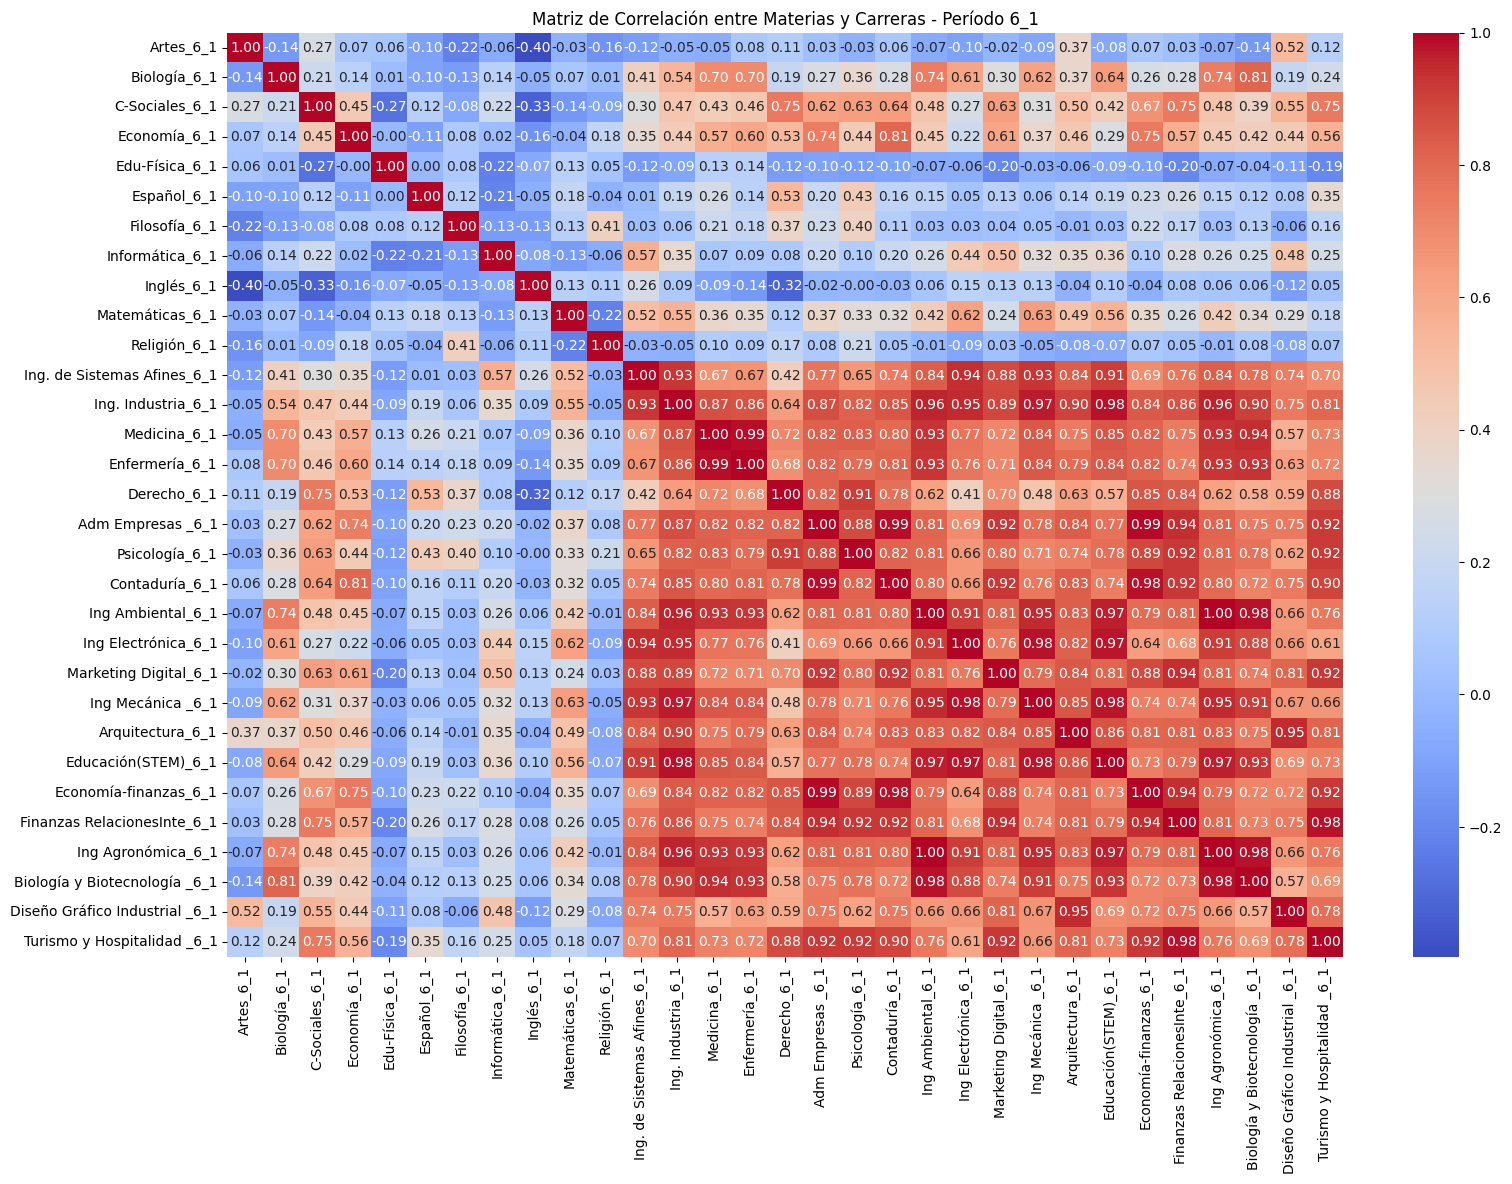

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos las columnas de materias y carreras
variables = ['Artes_6_1', 'Biología_6_1', 'C-Sociales_6_1', 'Economía_6_1',
             'Edu-Física_6_1', 'Español_6_1', 'Filosofía_6_1', 'Informática_6_1',
             'Inglés_6_1', 'Matemáticas_6_1', 'Religión_6_1',
             'Ing. de Sistemas Afines_6_1', 'Ing. Industria_6_1', 'Medicina_6_1',
             'Enfermería_6_1', 'Derecho_6_1', 'Adm Empresas _6_1', 'Psicología_6_1',
             'Contaduría_6_1', 'Ing Ambiental_6_1', 'Ing Electrónica_6_1',
             'Marketing Digital_6_1', 'Ing Mecánica _6_1', 'Arquitectura_6_1',
             'Educación(STEM)_6_1', 'Economía-finanzas_6_1', 'Finanzas RelacionesInte_6_1',
             'Ing Agronómica_6_1', 'Biología y Biotecnología _6_1',
             'Diseño Gráfico Industrial _6_1', 'Turismo y Hospitalidad _6_1']

# Calculamos la matriz de correlación
correlation_matrix = df6_1[variables].corr()

# Visualizamos la matriz de correlación con un mapa de calor
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Materias y Carreras - Período 6_1')
plt.show()


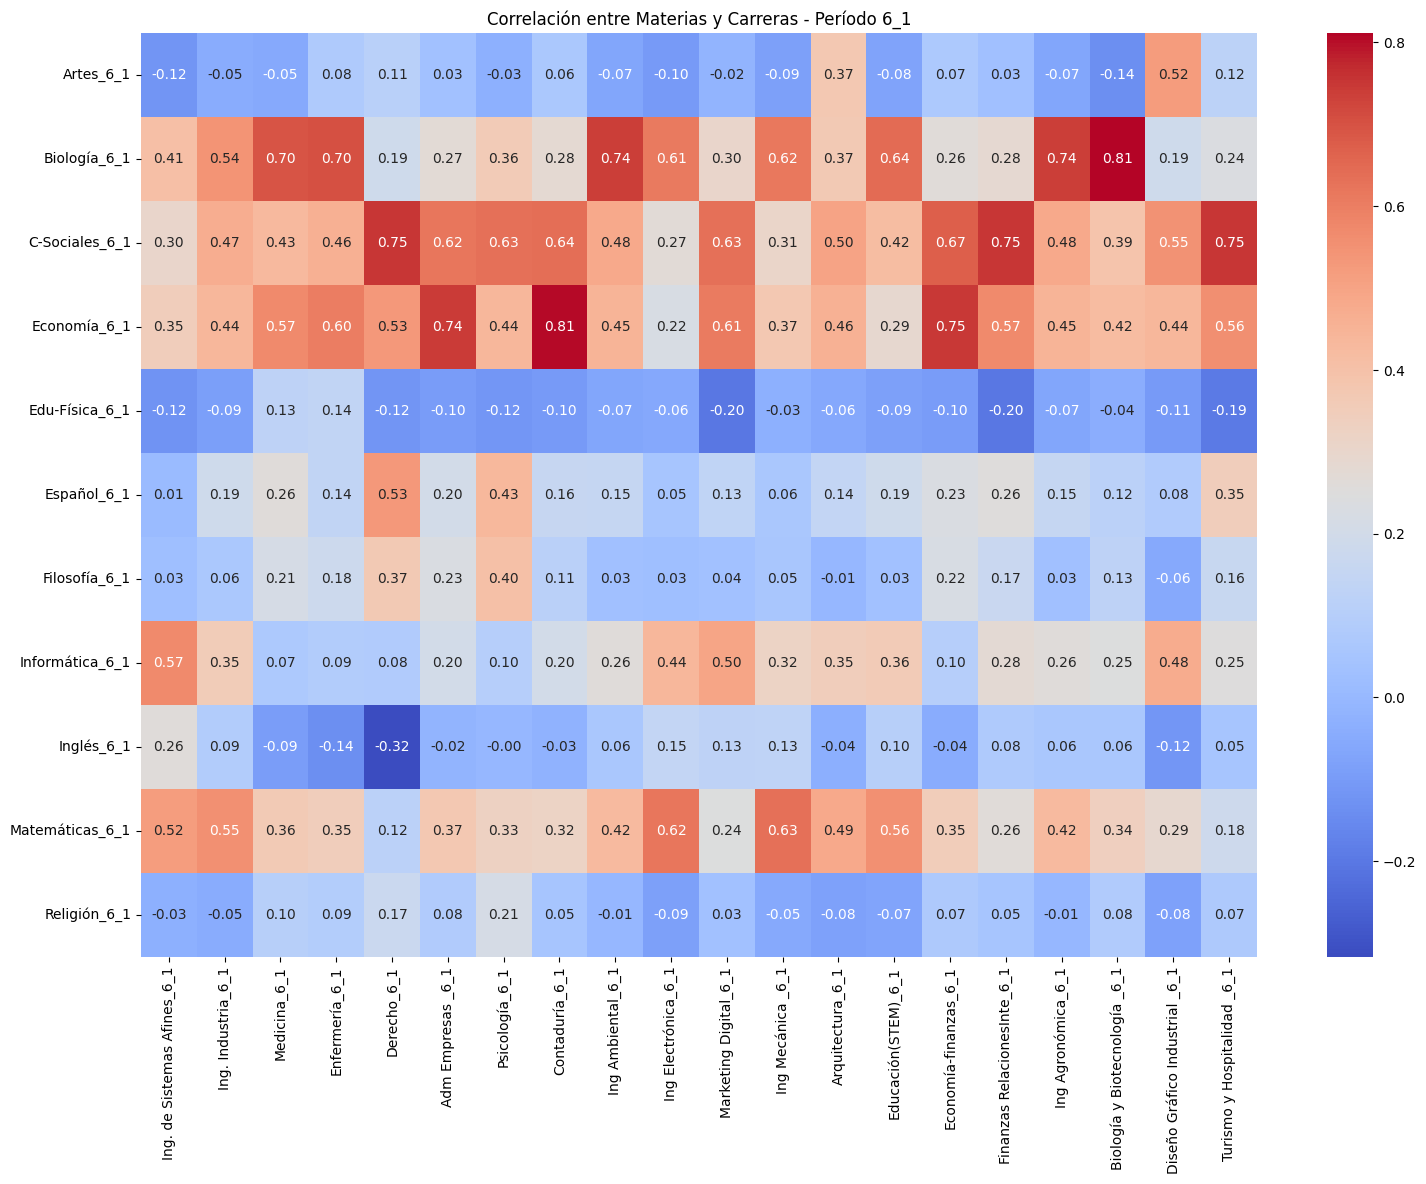

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Listamos las columnas de materias y carreras
materias = ['Artes_6_1', 'Biología_6_1', 'C-Sociales_6_1', 'Economía_6_1',
            'Edu-Física_6_1', 'Español_6_1', 'Filosofía_6_1', 'Informática_6_1',
            'Inglés_6_1', 'Matemáticas_6_1', 'Religión_6_1']

carreras = ['Ing. de Sistemas Afines_6_1', 'Ing. Industria_6_1', 'Medicina_6_1',
            'Enfermería_6_1', 'Derecho_6_1', 'Adm Empresas _6_1', 'Psicología_6_1',
            'Contaduría_6_1', 'Ing Ambiental_6_1', 'Ing Electrónica_6_1',
            'Marketing Digital_6_1', 'Ing Mecánica _6_1', 'Arquitectura_6_1',
            'Educación(STEM)_6_1', 'Economía-finanzas_6_1', 'Finanzas RelacionesInte_6_1',
            'Ing Agronómica_6_1', 'Biología y Biotecnología _6_1',
            'Diseño Gráfico Industrial _6_1', 'Turismo y Hospitalidad _6_1']

# Calculamos la matriz de correlación entre las materias y las carreras
correlation_matrix = df6_1[materias + carreras].corr()

# Filtramos la matriz de correlación para obtener solo la correlación entre materias y carreras
correlation_matrix_filtered = correlation_matrix.loc[materias, carreras]

# Visualizamos la matriz de correlación con un mapa de calor
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Materias y Carreras - Período 6_1')
plt.show()

# Mostrar la matriz de correlación en formato tabular
#print(correlation_matrix_filtered)


## Correlaciones Positivas y Negativas:

* **Correlaciones Positivas:** Los valores positivos indican que a medida que aumentan las notas en una materia, también tiende a aumentar la ponderación para una carrera específica.
* **Correlaciones Negativas:** Los valores negativos sugieren que un aumento en las notas de una materia está asociado con una disminución en la ponderación de una carrera específica.

### Identificación de Materias Influyentes:

* **Biología_6_1:** Tiene una fuerte correlación positiva con varias carreras, como:
  * Medicina_6_1 (0.695)
  * Enfermería_6_1 (0.704)
  * Biología y Biotecnología_6_1 (0.811)
  
  Esto sugiere que un buen desempeño en Biología está fuertemente asociado con una mayor ponderación en carreras relacionadas con ciencias de la salud y biotecnología.

* **Matemáticas_6_1:** También muestra correlaciones significativas con varias carreras, como:
  * Ing. Mecánica *6*1 (0.632)
  * Ing. Electrónica_6_1 (0.622)
  * Ingeniería de Sistemas Afines_6_1 (0.516)
  
  Esto indica que las notas en Matemáticas son importantes para las carreras de ingeniería.

* **C-Sociales_6_1:** Tiene una alta correlación con:
  * Derecho_6_1 (0.751)
  * Psicología_6_1 (0.631)
  * Varias otras carreras relacionadas con humanidades y ciencias sociales.

### Correlaciones Menores:

* **Artes_6_1 y Edu-Física_6_1:** Estas materias muestran correlaciones bajas o incluso negativas con la mayoría de las carreras. Esto podría indicar que:
  * No son determinantes principales en la ponderación de las carreras
  * Su influencia es más específica

In [ ]:
import pandas as pd

# Definimos las ponderaciones para cada carrera
ponderaciones_dict = {
    'Ing. de Sistemas Afines': [0.20, 0.05, 0.10, 0.05, 0.15, 0.00, 0.25, 0.05, 0.00, 0.05, 0.10],
    'Ing. Industrial': [0.20, 0.10, 0.15, 0.10, 0.10, 0.00, 0.15, 0.05, 0.00, 0.05, 0.10],
    'Medicina': [0.10, 0.10, 0.25, 0.05, 0.10, 0.05, 0.05, 0.05, 0.00, 0.10, 0.15],
    'Enfermería': [0.10, 0.10, 0.25, 0.05, 0.10, 0.05, 0.05, 0.05, 0.00, 0.10, 0.15],
    'Derecho': [0.05, 0.20, 0.05, 0.25, 0.10, 0.00, 0.05, 0.05, 0.05, 0.15, 0.05],
    'Adm Empresas': [0.15, 0.10, 0.05, 0.15, 0.10, 0.00, 0.10, 0.05, 0.00, 0.10, 0.20],
    'Psicología': [0.10, 0.15, 0.10, 0.20, 0.10, 0.00, 0.05, 0.05, 0.05, 0.15, 0.05],
    'Contaduría': [0.15, 0.10, 0.05, 0.15, 0.10, 0.00, 0.10, 0.05, 0.00, 0.05, 0.25],
    'Ing Ambiental': [0.15, 0.10, 0.25, 0.10, 0.10, 0.00, 0.10, 0.05, 0.00, 0.05, 0.10],
    'Ing Electrónica': [0.25, 0.05, 0.20, 0.05, 0.10, 0.00, 0.20, 0.05, 0.00, 0.05, 0.05],
    'Marketing Digital': [0.10, 0.10, 0.05, 0.15, 0.15, 0.00, 0.20, 0.05, 0.00, 0.05, 0.15],
    'Ing Mecánica': [0.25, 0.05, 0.20, 0.05, 0.10, 0.00, 0.15, 0.05, 0.00, 0.05, 0.10],
    'Arquitectura': [0.15, 0.10, 0.10, 0.05, 0.10, 0.00, 0.15, 0.20, 0.00, 0.05, 0.10],
    'Educación (STEM)': [0.20, 0.10, 0.20, 0.10, 0.10, 0.00, 0.15, 0.05, 0.00, 0.05, 0.05],
    'Economía-finanzas': [0.15, 0.10, 0.10, 0.20, 0.10, 0.00, 0.10, 0.05, 0.00, 0.10, 0.20],
    'Finanzas RelacionesInte': [0.10, 0.10, 0.05, 0.25, 0.15, 0.00, 0.10, 0.05, 0.00, 0.10, 0.10],
    'Ing Agronómica': [0.15, 0.10, 0.25, 0.10, 0.10, 0.00, 0.10, 0.05, 0.00, 0.05, 0.10],
    'Biología y Biotecnología': [0.10, 0.10, 0.30, 0.05, 0.10, 0.00, 0.10, 0.05, 0.00, 0.10, 0.10],
    'Diseño Gráfico Industrial': [0.10, 0.10, 0.05, 0.05, 0.10, 0.00, 0.20, 0.25, 0.00, 0.05, 0.10],
    'Turismo y Hospitalidad': [0.05, 0.15, 0.05, 0.20, 0.15, 0.00, 0.10, 0.10, 0.00, 0.10, 0.10]
}

# Convertimos el diccionario a un DataFrame
ponderaciones_df = pd.DataFrame.from_dict(ponderaciones_dict, orient='index',
                                          columns=['Matemáticas', 'Español', 'Biología', 'C-Sociales',
                                                   'Inglés', 'Edu-Física', 'Informática', 'Artes',
                                                   'Religión', 'Filosofía', 'Economía'])

ponderaciones_df


,Matemáticas,Español,Biología,C-Sociales,Inglés,Edu-Física,Informática,Artes,Religión,Filosofía,Economía
Ing. de Sistemas Afines,0.20,0.05,0.10,0.05,0.15,0.00,0.25,0.05,0.00,0.05,0.10
Ing. Industrial,0.20,0.10,0.15,0.10,0.10,0.00,0.15,0.05,0.00,0.05,0.10
Medicina,0.10,0.10,0.25,0.05,0.10,0.05,0.05,0.05,0.00,0.10,0.15
Enfermería,0.10,0.10,0.25,0.05,0.10,0.05,0.05,0.05,0.00,0.10,0.15
Derecho,0.05,0.20,0.05,0.25,0.10,0.00,0.05,0.05,0.05,0.15,0.05
Adm Empresas,0.15,0.10,0.05,0.15,0.10,0.00,0.10,0.05,0.00,0.10,0.20
Psicología,0.10,0.15,0.10,0.20,0.10,0.00,0.05,0.05,0.05,0.15,0.05
Contaduría,0.15,0.10,0.05,0.15,0.10,0.00,0.10,0.05,0.00,0.05,0.25
Ing Ambiental,0.15,0.10,0.25,0.10,0.10,0.00,0.10,0.05,0.00,0.05,0.10
Ing Electrónica,0.25,0.05,0.20,0.05,0.10,0.00,0.20,0.05,0.00,0.05,0.05


In [ ]:
# Multiplicamos las notas de las materias por las ponderaciones correspondientes para cada carrera
def calcular_puntaje_ponderado(row, ponderaciones_df):
    puntajes = {}
    for carrera in ponderaciones_df.index:
        ponderaciones = ponderaciones_df.loc[carrera].values
        materias_notas = row[['Matemáticas_6_1', 'Español_6_1', 'Biología_6_1', 'C-Sociales_6_1',
                              'Inglés_6_1', 'Edu-Física_6_1', 'Informática_6_1', 'Artes_6_1',
                              'Religión_6_1', 'Filosofía_6_1', 'Economía_6_1']].values
        puntaje = sum(ponderaciones * materias_notas)
        puntajes[carrera] = puntaje
    return pd.Series(puntajes)

# Aplicamos la función a cada fila del DataFrame
puntajes_df = df6_1.apply(calcular_puntaje_ponderado, axis=1, ponderaciones_df=ponderaciones_df)

# Agregamos la carrera con el mayor puntaje como nueva columna
df6_1['carrera_predicha'] = puntajes_df.idxmax(axis=1)

df6_1[['id_estudiante', 'carrera_predicha']].head()


,id_estudiante,carrera_predicha
0,1,Ing Mecánica
1,2,Diseño Gráfico Industrial
2,3,Ing Electrónica
3,4,Economía-finanzas
4,5,Ing Electrónica


In [ ]:
df6_1[['id_estudiante', 'carrera_predicha']].head(10)

,id_estudiante,carrera_predicha
0,1,Ing Mecánica
1,2,Diseño Gráfico Industrial
2,3,Ing Electrónica
3,4,Economía-finanzas
4,5,Ing Electrónica
5,6,Economía-finanzas
6,7,Economía-finanzas
7,8,Medicina
8,9,Economía-finanzas
9,10,Marketing Digital


In [ ]:
# Imprimimos las columnas carrera_predicha y carrera_predominante_6_1 para comparar
comparacion_df = df6_1[['id_estudiante', 'carrera_predicha', 'carrera_predominante_6_1']]

# Mostramos las primeras filas para revisión
print(comparacion_df.head())


   id_estudiante           carrera_predicha        carrera_predominante_6_1
0              1               Ing Mecánica               Ing Mecánica _6_1
1              2  Diseño Gráfico Industrial  Diseño Gráfico Industrial _6_1
2              3            Ing Electrónica             Ing Electrónica_6_1
3              4          Economía-finanzas           Economía-finanzas_6_1
4              5            Ing Electrónica             Ing Electrónica_6_1


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split

# Definimos las características (notas de materias)
X = df6_1[['Matemáticas_6_1', 'Español_6_1', 'Biología_6_1', 'C-Sociales_6_1',
           'Inglés_6_1', 'Edu-Física_6_1', 'Informática_6_1', 'Artes_6_1',
           'Religión_6_1', 'Filosofía_6_1', 'Economía_6_1']]

# Definimos las variables objetivo (puntajes ponderados para cada carrera)
y = puntajes_df  # El DataFrame de puntajes calculado antes, con columnas para cada carrera

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos un modelo de regresión múltiple utilizando Gradient Boosting
gbr = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
gbr.fit(X_train, y_train)

# Realizamos predicciones de los puntajes ponderados
y_pred = gbr.predict(X_test)

# Convertimos las predicciones a un DataFrame para análisis
y_pred_df = pd.DataFrame(y_pred, columns=y.columns)
print(y_pred_df.head())

# Si quieres ver las 3 carreras con mayores puntajes para cada estudiante:
top_carreras_con_porcentajes = y_pred_df.apply(
    lambda x: [(carrera, f"{x[carrera]:.2f}%") for carrera in x.nlargest(3).index], axis=1
)

# Mostramos los resultados con porcentajes
print(top_carreras_con_porcentajes)


   Ing. de Sistemas Afines  Ing. Industrial  Medicina  Enfermería   Derecho  \
0                 3.256727         3.138440  3.475073    3.475073  2.689036   
1                 2.465703         2.839273  2.564507    2.564507  3.099697   
2                 3.497615         3.586884  3.740734    3.740734  3.072336   
3                 3.009827         2.925186  3.079504    3.079504  2.474553   
4                 3.446893         3.577682  3.466887    3.466887  3.210711   

   Adm Empresas  Psicología  Contaduría  Ing Ambiental  Ing Electrónica  \
0      3.277257    3.036998    3.242969       3.293118         3.092938   
1      3.075598    3.051976    2.976505       2.487005         3.072714   
2      3.157762    3.243669    3.001360       3.650710         3.687746   
3      2.246587    2.627029    2.106153       3.355862         2.706231   
4      3.306561    3.268366    3.351214       3.597842         3.689408   

   Marketing Digital  Ing Mecánica  Arquitectura  Educación (STEM)  \
0   

In [ ]:
# prompt: quiero toda la primera fila de top_carreras_con_porcentajes

top_carreras_con_porcentajes.iloc[0]


[('Biología y Biotecnología', '3.50%'),
 ('Medicina', '3.48%'),
 ('Enfermería', '3.48%')]

In [ ]:
# Definimos las ponderaciones para cada carrera
ponderaciones_dict = {
    'Ing. de Sistemas Afines': [0.20, 0.05, 0.10, 0.05, 0.15, 0.00, 0.25, 0.05, 0.00, 0.05, 0.10],
    'Ing. Industrial': [0.20, 0.10, 0.15, 0.10, 0.10, 0.00, 0.15, 0.05, 0.00, 0.05, 0.10],
    'Medicina': [0.10, 0.10, 0.25, 0.05, 0.10, 0.05, 0.05, 0.05, 0.00, 0.10, 0.15],
    'Enfermería': [0.10, 0.10, 0.25, 0.05, 0.10, 0.05, 0.05, 0.05, 0.00, 0.10, 0.15],
    'Derecho': [0.05, 0.20, 0.05, 0.25, 0.10, 0.00, 0.05, 0.05, 0.05, 0.15, 0.05],
    'Adm Empresas': [0.15, 0.10, 0.05, 0.15, 0.10, 0.00, 0.10, 0.05, 0.00, 0.10, 0.20],
    'Psicología': [0.10, 0.15, 0.10, 0.20, 0.10, 0.00, 0.05, 0.05, 0.05, 0.15, 0.05],
    'Contaduría': [0.15, 0.10, 0.05, 0.15, 0.10, 0.00, 0.10, 0.05, 0.00, 0.05, 0.25],
    'Ing Ambiental': [0.15, 0.10, 0.25, 0.10, 0.10, 0.00, 0.10, 0.05, 0.00, 0.05, 0.10],
    'Ing Electrónica': [0.25, 0.05, 0.20, 0.05, 0.10, 0.00, 0.20, 0.05, 0.00, 0.05, 0.05],
    'Marketing Digital': [0.10, 0.10, 0.05, 0.15, 0.15, 0.00, 0.20, 0.05, 0.00, 0.05, 0.15],
    'Ing Mecánica': [0.25, 0.05, 0.20, 0.05, 0.10, 0.00, 0.15, 0.05, 0.00, 0.05, 0.10],
    'Arquitectura': [0.15, 0.10, 0.10, 0.05, 0.10, 0.00, 0.15, 0.20, 0.00, 0.05, 0.10],
    'Educación (STEM)': [0.20, 0.10, 0.20, 0.10, 0.10, 0.00, 0.15, 0.05, 0.00, 0.05, 0.05],
    'Economía-finanzas': [0.15, 0.10, 0.10, 0.20, 0.10, 0.00, 0.10, 0.05, 0.00, 0.10, 0.20],
    'Finanzas RelacionesInte': [0.10, 0.10, 0.05, 0.25, 0.15, 0.00, 0.10, 0.05, 0.00, 0.10, 0.10],
    'Ing Agronómica': [0.15, 0.10, 0.25, 0.10, 0.10, 0.00, 0.10, 0.05, 0.00, 0.05, 0.10],
    'Biología y Biotecnología': [0.10, 0.10, 0.30, 0.05, 0.10, 0.00, 0.10, 0.05, 0.00, 0.10, 0.10],
    'Diseño Gráfico Industrial': [0.10, 0.10, 0.05, 0.05, 0.10, 0.00, 0.20, 0.25, 0.00, 0.05, 0.10],
    'Turismo y Hospitalidad': [0.05, 0.15, 0.05, 0.20, 0.15, 0.00, 0.10, 0.10, 0.00, 0.10, 0.10]
}

# Convertimos el diccionario a un DataFrame
ponderaciones_df = pd.DataFrame.from_dict(ponderaciones_dict, orient='index',
                                          columns=['Matemáticas_6_1', 'Español_6_1', 'Biología_6_1', 'C-Sociales_6_1',
                                                   'Inglés_6_1', 'Edu-Física_6_1', 'Informática_6_1', 'Artes_6_1',
                                                   'Religión_6_1', 'Filosofía_6_1', 'Economía_6_1'])

# Calcular los puntajes ponderados para cada carrera
puntajes_estudiante_1 = {}
for carrera, pesos in ponderaciones_df.iterrows():
    puntaje = sum(notas_estudiante_1[materia].values[0] * peso for materia, peso in pesos.items())
    puntajes_estudiante_1[carrera] = puntaje

# Mostrar los puntajes ponderados
puntajes_estudiante_1_sorted = dict(sorted(puntajes_estudiante_1.items(), key=lambda item: item[1], reverse=True))
print(puntajes_estudiante_1_sorted)



{'Ing Mecánica': 3.7160000000000006, 'Economía-finanzas': 3.707, 'Medicina': 3.6785, 'Enfermería': 3.6785, 'Ing Ambiental': 3.655, 'Ing Agronómica': 3.655, 'Biología y Biotecnología': 3.6350000000000002, 'Ing Electrónica': 3.6240000000000006, 'Educación (STEM)': 3.5665000000000004, 'Ing. Industrial': 3.5399999999999996, 'Ing. de Sistemas Afines': 3.4655, 'Contaduría': 3.465, 'Adm Empresas': 3.3644999999999996, 'Arquitectura': 3.3364999999999996, 'Marketing Digital': 3.2674999999999996, 'Psicología': 3.1880000000000006, 'Finanzas RelacionesInte': 3.1830000000000003, 'Turismo y Hospitalidad': 3.1245000000000003, 'Diseño Gráfico Industrial': 3.111, 'Derecho': 3.0120000000000005}


In [ ]:
import pandas as pd

# Definimos las ponderaciones para cada carrera
ponderaciones_dict = {
    'Ing. de Sistemas Afines': [0.20, 0.05, 0.10, 0.05, 0.15, 0.00, 0.25, 0.05, 0.00, 0.05, 0.10],
    'Ing. Industrial': [0.20, 0.10, 0.15, 0.10, 0.10, 0.00, 0.15, 0.05, 0.00, 0.05, 0.10],
    'Medicina': [0.10, 0.10, 0.25, 0.05, 0.10, 0.05, 0.05, 0.05, 0.00, 0.10, 0.15],
    'Enfermería': [0.10, 0.10, 0.25, 0.05, 0.10, 0.05, 0.05, 0.05, 0.00, 0.10, 0.15],
    'Derecho': [0.05, 0.20, 0.05, 0.25, 0.10, 0.00, 0.05, 0.05, 0.05, 0.15, 0.05],
    'Adm Empresas': [0.15, 0.10, 0.05, 0.15, 0.10, 0.00, 0.10, 0.05, 0.00, 0.10, 0.20],
    'Psicología': [0.10, 0.15, 0.10, 0.20, 0.10, 0.00, 0.05, 0.05, 0.05, 0.15, 0.05],
    'Contaduría': [0.15, 0.10, 0.05, 0.15, 0.10, 0.00, 0.10, 0.05, 0.00, 0.05, 0.25],
    'Ing Ambiental': [0.15, 0.10, 0.25, 0.10, 0.10, 0.00, 0.10, 0.05, 0.00, 0.05, 0.10],
    'Ing Electrónica': [0.25, 0.05, 0.20, 0.05, 0.10, 0.00, 0.20, 0.05, 0.00, 0.05, 0.05],
    'Marketing Digital': [0.10, 0.10, 0.05, 0.15, 0.15, 0.00, 0.20, 0.05, 0.00, 0.05, 0.15],
    'Ing Mecánica': [0.25, 0.05, 0.20, 0.05, 0.10, 0.00, 0.15, 0.05, 0.00, 0.05, 0.10],
    'Arquitectura': [0.15, 0.10, 0.10, 0.05, 0.10, 0.00, 0.15, 0.20, 0.00, 0.05, 0.10],
    'Educación (STEM)': [0.20, 0.10, 0.20, 0.10, 0.10, 0.00, 0.15, 0.05, 0.00, 0.05, 0.05],
    'Economía-finanzas': [0.15, 0.10, 0.10, 0.20, 0.10, 0.00, 0.10, 0.05, 0.00, 0.10, 0.20],
    'Finanzas RelacionesInte': [0.10, 0.10, 0.05, 0.25, 0.15, 0.00, 0.10, 0.05, 0.00, 0.10, 0.10],
    'Ing Agronómica': [0.15, 0.10, 0.25, 0.10, 0.10, 0.00, 0.10, 0.05, 0.00, 0.05, 0.10],
    'Biología y Biotecnología': [0.10, 0.10, 0.30, 0.05, 0.10, 0.00, 0.10, 0.05, 0.00, 0.10, 0.10],
    'Diseño Gráfico Industrial': [0.10, 0.10, 0.05, 0.05, 0.10, 0.00, 0.20, 0.25, 0.00, 0.05, 0.10],
    'Turismo y Hospitalidad': [0.05, 0.15, 0.05, 0.20, 0.15, 0.00, 0.10, 0.10, 0.00, 0.10, 0.10]
}

# Convertimos el diccionario a un DataFrame
ponderaciones_df = pd.DataFrame.from_dict(ponderaciones_dict, orient='index',
                                          columns=['Matemáticas_6_1', 'Español_6_1', 'Biología_6_1', 'C-Sociales_6_1',
                                                   'Inglés_6_1', 'Edu-Física_6_1', 'Informática_6_1', 'Artes_6_1',
                                                   'Religión_6_1', 'Filosofía_6_1', 'Economía_6_1'])


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Aplicamos las ponderaciones a las características
X_weighted = X * ponderaciones_df.loc['Ing Mecánica'].values

# Definimos las variables objetivo (puntajes ponderados para cada carrera)
y = puntajes_df  # Aquí es el DataFrame de puntajes calculado previamente, con columnas para cada carrera

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_weighted, y, test_size=0.2, random_state=42)

# Entrenamos un modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# Realizamos predicciones
y_pred = model.predict(X_test)

# Convertimos las predicciones a un DataFrame para análisis
y_pred_df = pd.DataFrame(y_pred, columns=y.columns)


# Para cada estudiante, mostramos las 3 carreras con mayores puntajes junto con sus puntajes
top_carreras_con_porcentajes = y_pred_df.apply(lambda x: [(carrera, f"{x[carrera]:.2f}%") for carrera in x.nlargest(3).index], axis=1)

# Imprimimos el resultado
print(top_carreras_con_porcentajes)


0    [(Ing Electrónica, 3.31%), (Biología y Biotecn...
1    [(Derecho, 2.90%), (Psicología, 2.82%), (Econo...
2    [(Ing Electrónica, 3.69%), (Ing Mecánica, 3.64...
3    [(Biología y Biotecnología, 3.07%), (Diseño Gr...
4    [(Ing Electrónica, 3.97%), (Ing Mecánica, 3.89...
5    [(Ing Mecánica, 3.71%), (Ing Electrónica, 3.62...
6    [(Economía-finanzas, 3.43%), (Contaduría, 3.23...
7    [(Economía-finanzas, 4.19%), (Biología y Biote...
dtype: object


In [ ]:
# Crear una lista para almacenar los resultados
resultados_list = []

# Llenar la lista con los valores
for i, top_carreras in enumerate(top_carreras_con_porcentajes):
    resultados_list.append({
        'id_estudiante': i + 1,
        'carrera_1': top_carreras[0][0],
        'puntaje_1': top_carreras[0][1],
        'carrera_2': top_carreras[1][0],
        'puntaje_2': top_carreras[1][1],
        'carrera_3': top_carreras[2][0],
        'puntaje_3': top_carreras[2][1],
    })

# Convertir la lista en un DataFrame
resultados_df = pd.DataFrame(resultados_list)

# Mostrar el DataFrame
print(resultados_df)


   id_estudiante                 carrera_1 puntaje_1  \
0              1           Ing Electrónica     3.31%   
1              2                   Derecho     2.90%   
2              3           Ing Electrónica     3.69%   
3              4  Biología y Biotecnología     3.07%   
4              5           Ing Electrónica     3.97%   
5              6              Ing Mecánica     3.71%   
6              7         Economía-finanzas     3.43%   
7              8         Economía-finanzas     4.19%   

                   carrera_2 puntaje_2                carrera_3 puntaje_3  
0   Biología y Biotecnología     3.31%  Ing. de Sistemas Afines     3.27%  
1                 Psicología     2.82%        Economía-finanzas     2.76%  
2               Ing Mecánica     3.64%         Educación (STEM)     3.59%  
3  Diseño Gráfico Industrial     2.93%                 Medicina     2.88%  
4               Ing Mecánica     3.89%        Economía-finanzas     3.83%  
5            Ing Electrónica     3.62% 

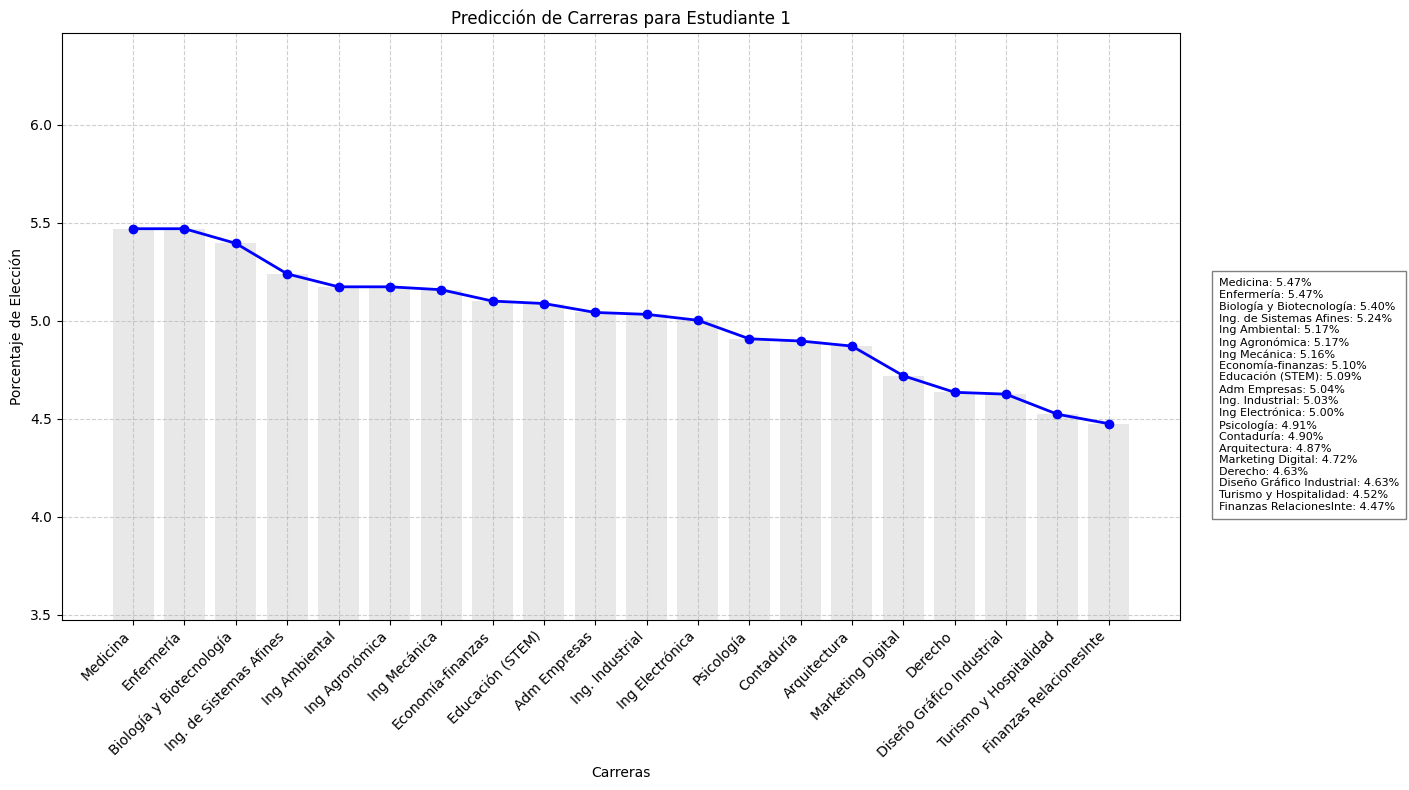

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Input: Notas de las materias
X = df6_1[['Matemáticas_6_1', 'Español_6_1', 'Biología_6_1', 'C-Sociales_6_1',
           'Inglés_6_1', 'Edu-Física_6_1', 'Informática_6_1', 'Artes_6_1',
           'Religión_6_1', 'Filosofía_6_1', 'Economía_6_1']]

# Output: Puntajes ponderados (target)
y = X @ ponderaciones_df.T

# Split de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Convertimos los puntajes en porcentajes
y_pred_percent = (y_pred / y_pred.sum(axis=1, keepdims=True)) * 100

# Visualización para el primer estudiante
carreras = ponderaciones_df.index
porcentajes = y_pred_percent[0]

# Ordenar carreras y porcentajes de mayor a menor
sorted_indices = np.argsort(porcentajes)[::-1]
carreras_sorted = carreras[sorted_indices]
porcentajes_sorted = porcentajes[sorted_indices]

plt.figure(figsize=(12, 8))

# Fondo de barras semitransparente
plt.bar(carreras_sorted, porcentajes_sorted, color='lightgray', alpha=0.5)

# Gráfico de líneas superpuesto
plt.plot(carreras_sorted, porcentajes_sorted, marker='o', color='blue', linestyle='-', linewidth=2)

# Ajustar los límites del eje Y
plt.ylim(min(porcentajes) - 1, max(porcentajes) + 1)

plt.xlabel('Carreras')
plt.ylabel('Porcentaje de Elección')
plt.title('Predicción de Carreras para Estudiante 1')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje X para mejor legibilidad
plt.grid(True, linestyle='--', alpha=0.6)

# Estilización adicional
plt.tight_layout()  # Para ajustar los márgenes y que el gráfico se vea mejor

# Mostrar la lista ordenada a la derecha de la gráfica
plt.figtext(1.02, 0.5,
            '\n'.join([f"{carrera}: {porcentaje:.2f}%" for carrera, porcentaje in zip(carreras_sorted, porcentajes_sorted)]),
            ha="left", fontsize=8, va="center", bbox={"facecolor":"white", "alpha":0.5, "pad":5})

plt.show()


# Modelo Utilizado

Estamos utilizando un **Random Forest Regressor** dentro de un **MultiOutputRegressor**. Esto significa que estamos aplicando un modelo de regresión que puede manejar múltiples salidas, en este caso, las diferentes carreras. Random Forest es un conjunto de árboles de decisión que toma múltiples submuestras de los datos para entrenar múltiples modelos y luego promediar sus predicciones, lo que lo hace robusto y menos propenso al sobreajuste.

## Explicación de las Ponderaciones y Pesos de Cada Carrera

1. **Ponderaciones de las Materias**:
   Cada carrera tiene una tabla de ponderaciones, que refleja cuán importantes son las diferentes materias para esa carrera específica. Por ejemplo, para la carrera de *Medicina*, las ponderaciones pueden ser 0.10 para *Matemáticas*, 0.10 para *Español*, 0.25 para *Biología*, etc. Estas ponderaciones se multiplican por las notas obtenidas por el estudiante en esas materias.

2. **Aplicación de las Ponderaciones**:
   En el código, multiplicamos la matriz de notas (`X`) por la matriz de ponderaciones `(ponderaciones_df.T)`. Esto nos da un conjunto de valores ponderados para cada carrera, que representan una especie de "puntuación" de qué tan bien el estudiante se ajusta a cada carrera, dado su rendimiento en las materias.

   ```python
   # Output: Puntajes ponderados (target)
   y = X @ ponderaciones_df.T
   
   Aquí `@` es la operación de multiplicación de matrices, lo que significa que cada nota del estudiante en cada materia se multiplica por la ponderación correspondiente de cada carrera, y luego se suman para obtener una puntuación total para cada carrera.

3. **Predicción de las Carreras**:
   Después de obtener las puntuaciones ponderadas, entrenamos un modelo de Random Forest utilizando estas puntuaciones como el "target" o salida. El modelo aprende a predecir estas puntuaciones en función de las notas del estudiante.

4. **Normalización a Porcentajes**:
   Para que los resultados sean más fáciles de interpretar, convertimos estas puntuaciones en porcentajes. Esto se hace dividiendo la puntuación de cada carrera por la suma total de todas las puntuaciones para ese estudiante y luego multiplicando por 100.

```python
# Convertimos los puntajes en porcentajes
y_pred_percent = (y_pred / y_pred.sum(axis=1, keepdims=True)) * 100

